<img src="https://static.wincacademy.nl/logos/main-logo.png" height=200px style="height: 200px"/>

# Assignment: Retail

Congratulations! You've reached the final assignment for the course before the bonus modules. Here we'll ask you to work with a dataset from the Dutch *Centraal Bureau voor de Statistiek* (CBS, English: Statistics Netherlands). It contains monthly growth percentages for various branches of the retail sector. You'll be required to answer open questions as well as write code that handles the data and crunches numbers.

*Answer open questions as though you were writing a report. Answers that are too vague, too short or too sloppy will be rejected.*

## 0. Load required modules

First, we need to load some modules that we're going to use. Do that in the next code cell. If you don't know yet which modules you'll use, just read on and come back here to import them later. **Don't forget to run the cell whenever you make an edit!**

In [51]:
import csv, time, itertools

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Data Preparation
Now we need to load and parse the data. The data should be located in the same folder as this notebook (whether that's on Google Colab or your local machine). Make sure you have working file path from your notebook to the supplied `data.csv` file. Put an `x` in the checkbox below when you're ready.

- [x] *I have a working file path to the `data.csv` file.*

You are now ready to proceed with reading the data into your program.

### 1.1 Read the CSV

The data comes in the form of a `csv`-file. CSV stands for 'comma separated values'. Oddly enough it need not be the case that the values are *really* separated by commas. In this case, the **delimiter** - the character that separates the columns within a datapoint - is *not* a comma. It's up to you to inspect `data.csv` and find out what the delimiter is.

Once you know what the delimiter is, you can use Python's `csv` module to read each of the datapoints to a dictionary. Some tips:

- The module's name is `csv`.
- You can find its documentation [here](https://docs.python.org/3/library/csv.html)
- We suggest you use the `DictReader` class. There's an example on how to use `DictReader` in the linked documentation.
- Instead of printing the rows (like in the example), we suggest you store all the rows as `dict`s in a `list`.

**1. In the code cell below, write code that opens and reads the data. By the end of the cell, you should have a variable `data` that is a list of dictionaries that each contain a datapoint.**

In [52]:
data = []

with open('/content/drive/MyDrive/Colab Notebooks/Final Assignment Retail/retail-data.csv', 'r') as f:
    reader = csv.DictReader(f, delimiter=';')
    for row in reader:
      data.append(row)

print(data)

[OrderedDict([('Bedrijfstakken/branches (SBI 2008)', '4711, 472 Winkels in voedingsmiddelen'), ('Perioden', '2005 januari'), ('Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)', '    73.1'), ('Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)', '    86.4')]), OrderedDict([('Bedrijfstakken/branches (SBI 2008)', '4711, 472 Winkels in voedingsmiddelen'), ('Perioden', '2005 februari'), ('Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)', '    71.5'), ('Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)', '    83.9')]), OrderedDict([('Bedrijfstakken/branches (SBI 2008)', '4711, 472 Winkels in voedingsmiddelen'), ('Perioden', '2005 maart'), ('Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)', '    83.0'), ('Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)', '    96.8')]), OrderedDict([('Bedrijfstakken/branches (SBI 2008)', '4711, 472 Winkels in voedingsmiddelen'), ('Perioden', '2005 april'), ('Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)', '    79.8'), ('Omzet ongecorri

### 1.2 Parse and clean the data

You now have a list of dictionaries that each contain some data. But what data? Answer the following questions to become familiar with this dataset. It requires you to write and execute Python code (you can add code cells if you wish), and also search the web for terms you're not familiar with.

**2. What are the column names in this dataset, and what do they mean? Be specific.**

*TODO: Your answer here.*

Bedrijfstakken/branches (SBI 2008); De betreffende bedrijfstak waar de data bij horen.

Perioden; De periode waarin de cijfers over gaan in stappen van een maand.

Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100); De omzet waarde geïndexeerd naar 2015.

Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100); Het omgezet volume geïndexeerd naar 2015.

**3. For each column, list what data type it should have (`str`, `int`, `float` or `datetime.date`).**

*TODO: Your answer here.*

Bedrijfstakken/branches (SBI 2008); String

Perioden; struct_time

Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100); Float

Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100); Float
    
**4. In the code cell below, write code that changes the column names to something more convenient for writing readable code. Be sure to choose English, correct and meaningful names.**

In [53]:
for i in data:
  if 'Bedrijfstakken/branches (SBI 2008)' in i:
    i['branche_type'] = i['Bedrijfstakken/branches (SBI 2008)']
    del i['Bedrijfstakken/branches (SBI 2008)']
  if 'Perioden' in i:
    i['period'] = i['Perioden']
    del i['Perioden']
  if 'Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)' in i:
    i['value_index'] = i['Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)']
    del i['Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)']
  if 'Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)' in i:
    i['volume_index'] = i['Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)']
    del i['Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)']
  #  print(i)

print(data)

[OrderedDict([('branche_type', '4711, 472 Winkels in voedingsmiddelen'), ('period', '2005 januari'), ('value_index', '    73.1'), ('volume_index', '    86.4')]), OrderedDict([('branche_type', '4711, 472 Winkels in voedingsmiddelen'), ('period', '2005 februari'), ('value_index', '    71.5'), ('volume_index', '    83.9')]), OrderedDict([('branche_type', '4711, 472 Winkels in voedingsmiddelen'), ('period', '2005 maart'), ('value_index', '    83.0'), ('volume_index', '    96.8')]), OrderedDict([('branche_type', '4711, 472 Winkels in voedingsmiddelen'), ('period', '2005 april'), ('value_index', '    79.8'), ('volume_index', '    94.1')]), OrderedDict([('branche_type', '4711, 472 Winkels in voedingsmiddelen'), ('period', '2005 mei'), ('value_index', '    78.5'), ('volume_index', '    92.1')]), OrderedDict([('branche_type', '4711, 472 Winkels in voedingsmiddelen'), ('period', '2005 juni'), ('value_index', '    82.3'), ('volume_index', '    96.5')]), OrderedDict([('branche_type', '4711, 472 Wi

**5. In the code cell below, write code that casts all the data to the right type.**

Tips:
- If you overwite your data, running the casting operation you're about to implement more than once might result in errors. In that case you can opt not to reuse a variable or restart and rerun your notebook for every retry.
- The data is in Dutch. For some columns this does not matter, but for one in particular it makes parsing it a little bit harder. There is a way to handle this in a few lines of code. You'll need Python's `locale` module for this, as well as the special string `'nl_NL.UTF-8'`. If you're not sure how to use this information after searching the web for a while, it's OK to take the long way around and write custom code to handle the Dutch words.
- The parsing script is bound to run into errors. **Do not modify the data file on disk.** Carefully read the error, examine why it works on most values and crashes on some others, and apply a fix in your code! We'll give you some tips:
    - A handful of values in the `Perioden`-column might cause an error due to an unexpected character. You can safely ignore that character.
    - Handle missing numerical values by replacing them with `-1.`. Be sure to maintain the correct datatype for that column!

In [54]:
for i in data:
  if '*' in i['period']:                                                          # removing marks from the data
    i['period'] = i['period'].replace('*', '')
  
  if 'januari' in i['period']:                                                    # translating month names
    i['period'] = i['period'].replace('januari', 'january')
  if 'februari' in i['period']:
    i['period'] = i['period'].replace('februari', 'february')
  if 'maart' in i['period']:
    i['period'] = i['period'].replace('maart', 'march')
  # april
  if 'mei' in i['period']:
    i['period'] = i['period'].replace('mei', 'may')
  if 'juni' in i['period']:
    i['period'] = i['period'].replace('juni', 'june')
  if 'juli' in i['period']:
    i['period'] = i['period'].replace('juli', 'july')
  if 'augustus' in i['period']:
    i['period'] = i['period'].replace('augustus', 'august')
  # september
  if 'oktober' in i['period']:
    i['period'] = i['period'].replace('oktober', 'october')
  # november
  if 'december ' in i['period']:                                                  # getting rid of a typo in the data
    i['period'] = i['period'].replace('december ', 'december')

  if type(i['period']) == str:                                                    # turning string into struct_time
    i['period'] = time.strptime(i['period'], '%Y %B')

  if '       .' in i['value_index']:                                              # setting empty values to -1
    i['value_index'] = i['value_index'].replace('       .', '-1')
  if '       .' in i['volume_index']:                                             
    i['volume_index'] = i['volume_index'].replace('       .', '-1')
  
  if ' ' in i['value_index']:                                                     # removing spaces
    i['value_index'] = i['value_index'].replace(' ', '')
  if ' ' in i['volume_index']:                                                    
    i['volume_index'] = i['volume_index'].replace(' ', '')

  i['value_index'] = float(i['value_index'])                                      # cast values to float
  i['volume_index'] = float(i['volume_index'])

## 2. Data Exploration

You are now ready to explore the data.

**6. In the code cell below, print the following metadata. Format the printed text in a nice and tidy way. Put an `x` in the checkboxes when you've succeeded.**

- [ ] **The number of datapoints in the dataset.**
- [ ] **The number of unique branches of the retail sector the data covers.**
- [ ] **The first month covered by the data.**
- [ ] **The last month covered by the data.**

In [55]:
num_of_datapoints = 0
for i in data:
  num_of_datapoints = num_of_datapoints + len(i)
print()
print('number of datapoints (including replaced missing values):')
print(num_of_datapoints)
print()

list_of_branches = []
for i in data:
  list_of_branches.append(i['branche_type'])
print('unique number of branches:')
print(len(set(list_of_branches)))
#print(set(list_of_branches))
print()

list_of_dates = []
for i in data:
  list_of_dates.append(i['period'])
print('first month in data:')
print(time.strftime('%B %Y', (min(list_of_dates))))
print()
print('last month in data:')
print(time.strftime('%B %Y', (max(list_of_dates))))
print()


number of datapoints (including replaced missing values):
12480

unique number of branches:
16

first month in data:
January 2005

last month in data:
March 2021



**7. In the code cell below, extract the revenue numbers for the following two sectors and put them in a list named exactly as indicated. Also create a list that contains all the months in ascending order. Run the cell after it to see a plot of the numbers if you did it correctly.**

- [ ] Months in ascending order $\Longrightarrow$ `months`
- [ ] Clothing stores $\Longrightarrow$  `clothing_stores_revenue`
    - Tip: the Dutch word for *'clothing'* is *'kleding'*
- [ ] Mail order companies and web shops $\Longrightarrow$ `mail_order_revenue`
    - Tip: the Dutch term for *'mail order companies'* is *'postorderbedrijven'*

In [56]:
list_of_unique_dates = []
for i in data:
  if i['period'] not in list_of_unique_dates:
    list_of_unique_dates.append(i['period'])

months = []
for i in list_of_unique_dates:
  months.append(time.strftime('%Y-%m', i))
print(months)

clothing_stores_revenue = []
for i in data:
  if 'kleding' in i['branche_type']:
    clothing_stores_revenue.append(i['value_index'])
print(clothing_stores_revenue)

mail_order_revenue = []
for i in data:
  if 'Postorderbedrijven' in i['branche_type']:
    mail_order_revenue.append(i['value_index'])
print(mail_order_revenue)


['2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06', '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07'

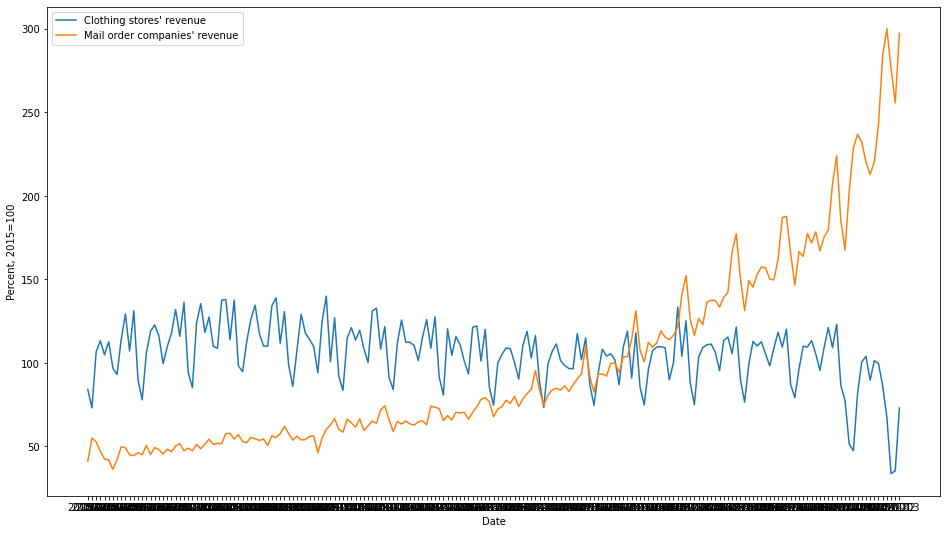

In [57]:
# Do not modify the code in this cell.
import matplotlib.pyplot as plt
%matplotlib inline

try:
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(months, clothing_stores_revenue, label="Clothing stores' revenue")
    ax.plot(months, mail_order_revenue, label="Mail order companies' revenue")
    ax.set_xlabel('Date')
    ax.set_ylabel('Percent, 2015=100')
    ax.legend()
    plt.show()
except Exception as e:
    print('There was an error creating the plot.\n'
          'Check if your lists are correctly named and assembled.\n'
          "Here's your error, for your debugging pleasure.")
    raise e

**8. How do the two branches compare? Discuss any yearly cycles you observe, as well as long-term developments. Also explain why you think these patterns are there. Pretend you are writing this to your supervisor or a client who asked you to analyze this dataset.**

De jaarlijkse cyclus van de kleding branche is duidelijk seizoensgebonden en behoorlijk volatiel. In de eerste helft van de data zien we dat de postorder branche dit patroon niet overtuigend navolgt, waarschijnlijk is de postorder branche hier nog minder afhankelijk van de kledingaankopen. 

In de tweede helft van de data zien we de jaarlijkse cyclus aanhoudend meer overeenkomen, wat zou kunnen duiden op meer kleding verkopen via postorder winkels. Het afzwakken van de kleding winkel omzet tegenover het sterke pieken van de postorder omzet zou hier een bevestiging van kunnen zijn.

Zo te zien zit er bij kleding winkels een significante piek voor de eindejaars feestdagen en dip erna. Bij de zomervakantie periode zien we een vergelijkbare trend. Het is aanemelijk dat consumenten kleding specifiek voor deze seizoenen kopen en daarna ook minder uit te geven hebben.

De opmerkelijke groei van de postorder branche omzet is goed te verklaren door de 'corona virus pandemie' in deze periode.

## 3. Computing With Data

### 3.1 Year Over Year Change

Let's take a closer look at these two branches of retail: clothing stores and mail order companies. A commonly used metric in business is the year-over-year revenue change. It is computed like so:

$$\text{YoY}_\text{month} = \frac{\text{Revenue}_\text{month}}{\text{Revenue}_\text{same month last year}} \times 100$$

Search the web for a longer explanation of this term if you'd like one.

**9. Why should we compare revenue for a particular month to the revenue of that same month, one year ago?**

Veel branches zijn onderhevig aan seizoensgebonden schommelingen in omzet, daarom is de omzet in dezelfde maand van een ander jaar het meest representatief voor de situatie om de cijfers heen.

**10. In the code cell below, compute the year-over-year revenue change for every month, for both branches of the retail sector, each in their own new list. Skip the first year (why?). Put an `x` in the checkboxes when you're ready. Run the next cell to see a new plot for your data.**

- [x] Clothing stores $\Longrightarrow$ `clothing_stores_yoy`
- [x] Mail order companies $\Longrightarrow$ `mail_order_yoy`



In [58]:
clothing_revenue_selection = []                                                   # select data to use, without 2005 because we have no data of 2004 to compare it to
for i in data:
  if 'kleding' in i['branche_type']:
    if 2005 not in i['period']:
      clothing_revenue_selection.append(i)

mail_revenue_selection = []
for i in data:
  if 'Postorderbedrijven' in i['branche_type']:
    if 2005 not in i['period']:
      mail_revenue_selection.append(i)

previous_clothing_01 = 84.1                                                       # hardcode values from 2005 as starting value for the yoy calculation
previous_clothing_02 = 73.1
previous_clothing_03 = 106.7
previous_clothing_04 = 113.3
previous_clothing_05 = 104.9
previous_clothing_06 = 112.7
previous_clothing_07 = 96.9
previous_clothing_08 = 93.1
previous_clothing_09 = 114.4
previous_clothing_10 = 129.3
previous_clothing_11 = 107.1
previous_clothing_12 = 131.3

previous_mail_01 = 41.2
previous_mail_02 = 55.0
previous_mail_03 = 52.8
previous_mail_04 = 47.1
previous_mail_05 = 42.5
previous_mail_06 = 41.9
previous_mail_07 = 36.3
previous_mail_08 = 42.1
previous_mail_09 = 49.9
previous_mail_10 = 49.2
previous_mail_11 = 45.0
previous_mail_12 = 44.5

clothing_stores_yoy = []                                                          # create the lists
mail_order_yoy = []

for i in clothing_revenue_selection:                                              # run the yoy calculation for every month of every year and append the outcome as we go
  if '01' == time.strftime('%m', i['period']):
    clothing_stores_yoy.append(round((i['value_index']/previous_clothing_01)*100, 1))
  if '02' == time.strftime('%m', i['period']):
    clothing_stores_yoy.append(round((i['value_index']/previous_clothing_02)*100, 1))
  if '03' == time.strftime('%m', i['period']):
    clothing_stores_yoy.append(round((i['value_index']/previous_clothing_03)*100, 1))
  if '04' == time.strftime('%m', i['period']):
    clothing_stores_yoy.append(round((i['value_index']/previous_clothing_04)*100, 1))
  if '05' == time.strftime('%m', i['period']):
    clothing_stores_yoy.append(round((i['value_index']/previous_clothing_05)*100, 1))
  if '06' == time.strftime('%m', i['period']):
    clothing_stores_yoy.append(round((i['value_index']/previous_clothing_06)*100, 1))
  if '07' == time.strftime('%m', i['period']):
    clothing_stores_yoy.append(round((i['value_index']/previous_clothing_07)*100, 1))
  if '08' == time.strftime('%m', i['period']):
    clothing_stores_yoy.append(round((i['value_index']/previous_clothing_08)*100, 1))
  if '09' == time.strftime('%m', i['period']):
    clothing_stores_yoy.append(round((i['value_index']/previous_clothing_09)*100, 1))
  if '10' == time.strftime('%m', i['period']):
    clothing_stores_yoy.append(round((i['value_index']/previous_clothing_10)*100, 1))
  if '11' == time.strftime('%m', i['period']):
    clothing_stores_yoy.append(round((i['value_index']/previous_clothing_11)*100, 1))
  if '12' == time.strftime('%m', i['period']):
    clothing_stores_yoy.append(round((i['value_index']/previous_clothing_12)*100, 1))

for i in mail_revenue_selection:
  if '01' == time.strftime('%m', i['period']):
    mail_order_yoy.append(round((i['value_index']/previous_mail_01)*100, 1))
  if '02' == time.strftime('%m', i['period']):
    mail_order_yoy.append(round((i['value_index']/previous_mail_02)*100, 1))
  if '03' == time.strftime('%m', i['period']):
    mail_order_yoy.append(round((i['value_index']/previous_mail_03)*100, 1))
  if '04' == time.strftime('%m', i['period']):
    mail_order_yoy.append(round((i['value_index']/previous_mail_04)*100, 1))
  if '05' == time.strftime('%m', i['period']):
    mail_order_yoy.append(round((i['value_index']/previous_mail_05)*100, 1))
  if '06' == time.strftime('%m', i['period']):
    mail_order_yoy.append(round((i['value_index']/previous_mail_06)*100, 1))
  if '07' == time.strftime('%m', i['period']):
    mail_order_yoy.append(round((i['value_index']/previous_mail_07)*100, 1))
  if '08' == time.strftime('%m', i['period']):
    mail_order_yoy.append(round((i['value_index']/previous_mail_08)*100, 1))
  if '09' == time.strftime('%m', i['period']):
    mail_order_yoy.append(round((i['value_index']/previous_mail_09)*100, 1))
  if '10' == time.strftime('%m', i['period']):
    mail_order_yoy.append(round((i['value_index']/previous_mail_10)*100, 1))
  if '11' == time.strftime('%m', i['period']):
    mail_order_yoy.append(round((i['value_index']/previous_mail_11)*100, 1))
  if '12' == time.strftime('%m', i['period']):
    mail_order_yoy.append(round((i['value_index']/previous_mail_12)*100, 1))

print(clothing_stores_yoy)
print(mail_order_yoy)

[107.0, 106.6, 99.2, 105.0, 117.1, 103.1, 102.8, 117.9, 102.9, 102.1, 108.2, 103.9, 112.1, 116.6, 116.1, 119.6, 112.8, 113.1, 113.4, 116.9, 120.3, 106.7, 106.4, 104.8, 116.9, 129.7, 105.8, 111.6, 128.3, 104.4, 113.7, 118.2, 117.3, 107.5, 104.4, 99.5, 117.6, 117.5, 101.0, 114.0, 112.4, 101.2, 113.3, 101.1, 109.0, 108.3, 94.0, 96.7, 109.3, 114.4, 107.6, 107.0, 108.4, 106.1, 112.0, 107.6, 114.6, 102.7, 101.1, 92.8, 108.6, 115.0, 105.0, 110.9, 107.2, 99.7, 114.0, 108.9, 100.8, 97.4, 101.6, 97.2, 108.8, 110.5, 112.8, 92.2, 110.4, 98.4, 104.2, 100.3, 106.0, 94.5, 94.4, 91.5, 101.3, 102.2, 93.6, 92.9, 103.9, 96.3, 103.5, 97.0, 96.7, 92.0, 96.2, 88.7, 105.0, 100.3, 93.3, 94.4, 106.2, 90.1, 101.5, 103.9, 84.4, 91.0, 95.1, 87.6, 103.4, 102.1, 88.1, 95.5, 99.2, 93.6, 105.2, 93.3, 95.8, 92.1, 85.0, 89.9, 101.8, 102.5, 90.1, 94.8, 104.4, 97.4, 112.6, 96.6, 87.7, 103.2, 97.1, 95.4, 104.8, 102.7, 97.0, 96.4, 105.7, 98.8, 109.8, 102.5, 99.2, 89.3, 98.6, 92.5, 107.0, 104.8, 93.0, 99.6, 105.1, 100.0, 10

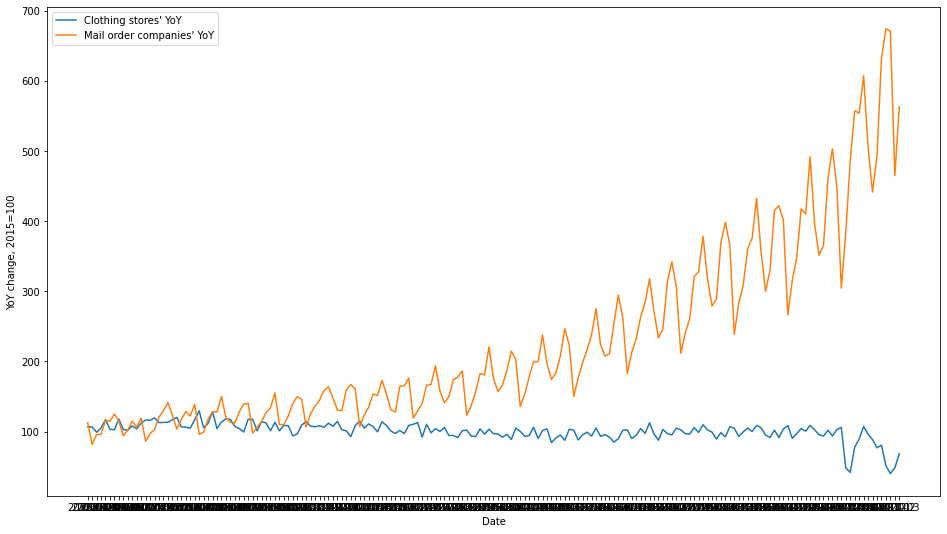

In [59]:
try:
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(months[12:], clothing_stores_yoy, label="Clothing stores' YoY")
    ax.plot(months[12:], mail_order_yoy, label="Mail order companies' YoY")
    ax.set_xlabel('Date')
    ax.set_ylabel('YoY change, 2015=100')
    ax.legend()
    plt.show()
except Exception as e:
    print('There was an error creating the plot.\n'
          'Check if your lists are correctly named and assembled.\n'
          "Here's your error, for your debugging pleasure.")
    raise e

**11. In the code cell below, find the best and worst months for both branches of the retail sector in terms of year-over-year revenue change. Print the branch, month and YoY in a nice and tidy way.**

In [60]:
print('Clothing stores:')
print('Best: ', max(clothing_stores_yoy))
print('Worst: ', min(clothing_stores_yoy))
print()
print('Mail order companies:')
print('Best: ', max(mail_order_yoy))
print('Worst: ', min(mail_order_yoy))

Clothing stores:
Best:  129.7
Worst:  40.2

Mail order companies:
Best:  674.2
Worst:  81.8


### 3.2 Similarity Between Branches

We've seen that the pattern for revenue is quite different for clothing stores and mail order companies. In other words: their revenues don't move up or down together. A way to make this observation more specific is to compute the **correlation coefficient**. It is a number between $-1$ and $1$ that describes the relation between two *random variables*. Here is how it works applied to our revenue numbers:

- If the correlation coefficient for the revenue of two branches of the retail sector is $1$, their revenue is *positively correlated*. This means that when the revenue of branch A goes up, the revenue of branch B also goes up. In other words: the revenues for both branches go up together.
- If the correlation coefficient is $-1$, the revenues of the two branches are *negatively correlated*. This means that if A's revenue goes up, B's revenue goes down. Similarly, if B's revenue goes up, A's revenue goes down. They move in the exact opposite direction.
- If the correlation coefficient is $0$, there is no clear pattern between the revenues of both branches.

Here's a table that summarizes this information:

| Correlation coefficient | Meaning                              |
|-------------------------|--------------------------------------|
| $1$                     | Revenues go up together              |
| $0$                     | No pattern                           |
| $-1$                    | Revenues move in opposite directions |

Note that there is a continuous scale between $-1$ and $1$! A correlation coefficient of $0.3$ indicates a somewhat positively correlated relationship.

And here's an image that visualizes the correlation coefficient.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg"/>

We've provided a function `corrcoef` that computes the correlation coefficient for two lists.

**11. In the code cell below, use the function `corrcoef` to compute the correlation coefficient for each pair of branches in our dataset. Then print a sorted table that shows each unique pair and their correlation coefficients. You can take inspiration from this table (but it doesn't have to look exactly like it):**

```
Coeff   Branch A                                          Branch B                                          
===========================================================================================================
0.98    4711, 472 Winkels in voedingsmiddelen             4711 Supermarkten                                 
0.91    475 Winkels in overige huishoudwaren              4752 Winkels in doe-het-zelfartikelen             
0.91    47528 Bouwmarkten                                 4752 Winkels in doe-het-zelfartikelen               
```

In [62]:
import numpy as np

# Provided function. Use this to obtain the correlation coefficient for two lists.
def corrcoef(branch_a, branch_b):
    return np.corrcoef(branch_a, branch_b)[0, 1]

# Your code here.
food_4711_revenue_2005 = []                                                       # create a list of 2005 values and a list of filtered values for each remaining branche
food_4711_revenue_selection = []

food_revenue_2005 = []
food_revenue_selection = []

consumer_electronics_revenue_2005 = []
consumer_electronics_revenue_selection = []

household_475_revenue_2005 = []
household_475_revenue_selection = []

interior_revenue_2005 = []
interior_revenue_selection = []

diy_revenue_2005 = []
diy_revenue_selection = []

hardware_revenue_2005 = []
hardware_revenue_selection = []

household_4759_revenue_2005 = []
household_4759_revenue_selection = []

recreation_revenue_2005 = []
recreation_revenue_selection = []

toys_revenue_2005 = []
toys_revenue_selection = []

leather_revenue_2005 = []
leather_revenue_selection = []

drug_revenue_2005 = []
drug_revenue_selection = [] 

super_revenue_2005 = []
super_revenue_selection = []

non_foodart_revenue_2005 = []
non_foodart_revenue_selection = []

for i in data:

  if '4711, 472 Winkels in voedingsmiddelen' == i['branche_type']:
    if 2005 in i['period']:
      food_4711_revenue_2005.append(i['value_index'])
    else:
      food_4711_revenue_selection.append(i)

  if '472 Winkels in voedingsmiddelen' == i['branche_type']:
    if 2005 in i['period']:
      food_revenue_2005.append(i['value_index'])
    else:
      food_revenue_selection.append(i)

  if '474 Winkels in consumentenelektronica' == i['branche_type']:
    if 2005 in i['period']:
      consumer_electronics_revenue_2005.append(i['value_index'])
    else:
      consumer_electronics_revenue_selection.append(i)

  if '475 Winkels in overige huishoudwaren' == i['branche_type']:
    if 2005 in i['period']:
      household_475_revenue_2005.append(i['value_index'])
    else:
      household_475_revenue_selection.append(i)
     
  if 'Winkels in meubels, woninginrichting alg' == i['branche_type']:
    if 2005 in i['period']:
      interior_revenue_2005.append(i['value_index'])
    else:
      interior_revenue_selection.append(i)
      
  if '4752 Winkels in doe-het-zelfartikelen' == i['branche_type']:
    if 2005 in i['period']:
      diy_revenue_2005.append(i['value_index'])
    else:
      diy_revenue_selection.append(i)

  if '47528 Bouwmarkten' == i['branche_type']:
    if 2005 in i['period']:
      hardware_revenue_2005.append(i['value_index'])
    else:
      hardware_revenue_selection.append(i)

  if '4759 Winkels overige huishoudartikelen' == i['branche_type']:
    if 2005 in i['period']:
      household_4759_revenue_2005.append(i['value_index'])
    else:
      household_4759_revenue_selection.append(i)

  if '476 Winkels in recreatieartikelen' == i['branche_type']:
    if 2005 in i['period']:
      recreation_revenue_2005.append(i['value_index'])
    else:
      recreation_revenue_selection.append(i)

  if '4765 Speelgoedwinkels' == i['branche_type']:
    if 2005 in i['period']:
      toys_revenue_2005.append(i['value_index'])
    else:
      toys_revenue_selection.append(i)

  if '4772 Winkels in schoenen en lederwaren' == i['branche_type']:
    if 2005 in i['period']:
      leather_revenue_2005.append(i['value_index'])
    else:
      leather_revenue_selection.append(i)

  if '47741 Drogisterijen' == i['branche_type']:
    if 2005 in i['period']:
      drug_revenue_2005.append(i['value_index'])
    else:
      drug_revenue_selection.append(i)

  if '4711 Supermarkten' == i['branche_type']:
    if 2005 in i['period']:
      super_revenue_2005.append(i['value_index'])
    else:
      super_revenue_selection.append(i)

  if '4719, 474-477 Winkels in non-foodart.' == i['branche_type']:
    if 2005 in i['period']:
      non_foodart_revenue_2005.append(i['value_index'])
    else:
      non_foodart_revenue_selection.append(i)

food_4711_yoy = []
food_yoy = []
consumer_electronics_yoy = []
household_475_yoy = []
interior_yoy = []
diy_yoy = []
hardware_yoy = []
household_4759_yoy = []
recreation_yoy = []
toys_yoy = []
leather_yoy = []
drug_yoy = []
super_yoy = []
non_foodart_yoy = []

for i in food_4711_revenue_selection:                                              # run the yoy calculation for every month of every year and append the outcome as we go
  if '01' == time.strftime('%m', i['period']):
    food_4711_yoy.append(round((i['value_index']/food_4711_revenue_2005[0])*100, 1))
  if '02' == time.strftime('%m', i['period']):
    food_4711_yoy.append(round((i['value_index']/food_4711_revenue_2005[1])*100, 1))
  if '03' == time.strftime('%m', i['period']):
    food_4711_yoy.append(round((i['value_index']/food_4711_revenue_2005[2])*100, 1))
  if '04' == time.strftime('%m', i['period']):
    food_4711_yoy.append(round((i['value_index']/food_4711_revenue_2005[3])*100, 1))
  if '05' == time.strftime('%m', i['period']):
    food_4711_yoy.append(round((i['value_index']/food_4711_revenue_2005[4])*100, 1))
  if '06' == time.strftime('%m', i['period']):
    food_4711_yoy.append(round((i['value_index']/food_4711_revenue_2005[5])*100, 1))
  if '07' == time.strftime('%m', i['period']):
    food_4711_yoy.append(round((i['value_index']/food_4711_revenue_2005[6])*100, 1))
  if '08' == time.strftime('%m', i['period']):
    food_4711_yoy.append(round((i['value_index']/food_4711_revenue_2005[7])*100, 1))
  if '09' == time.strftime('%m', i['period']):
    food_4711_yoy.append(round((i['value_index']/food_4711_revenue_2005[8])*100, 1))
  if '10' == time.strftime('%m', i['period']):
    food_4711_yoy.append(round((i['value_index']/food_4711_revenue_2005[9])*100, 1))
  if '11' == time.strftime('%m', i['period']):
    food_4711_yoy.append(round((i['value_index']/food_4711_revenue_2005[10])*100, 1))
  if '12' == time.strftime('%m', i['period']):
    food_4711_yoy.append(round((i['value_index']/food_4711_revenue_2005[11])*100, 1))

for i in food_revenue_selection:
  if '01' == time.strftime('%m', i['period']):
    food_yoy.append(round((i['value_index']/food_revenue_2005[0])*100, 1))
  if '02' == time.strftime('%m', i['period']):
    food_yoy.append(round((i['value_index']/food_revenue_2005[1])*100, 1))
  if '03' == time.strftime('%m', i['period']):
    food_yoy.append(round((i['value_index']/food_revenue_2005[2])*100, 1))
  if '04' == time.strftime('%m', i['period']):
    food_yoy.append(round((i['value_index']/food_revenue_2005[3])*100, 1))
  if '05' == time.strftime('%m', i['period']):
    food_yoy.append(round((i['value_index']/food_revenue_2005[4])*100, 1))
  if '06' == time.strftime('%m', i['period']):
    food_yoy.append(round((i['value_index']/food_revenue_2005[5])*100, 1))
  if '07' == time.strftime('%m', i['period']):
    food_yoy.append(round((i['value_index']/food_revenue_2005[6])*100, 1))
  if '08' == time.strftime('%m', i['period']):
    food_yoy.append(round((i['value_index']/food_revenue_2005[7])*100, 1))
  if '09' == time.strftime('%m', i['period']):
    food_yoy.append(round((i['value_index']/food_revenue_2005[8])*100, 1))
  if '10' == time.strftime('%m', i['period']):
    food_yoy.append(round((i['value_index']/food_revenue_2005[9])*100, 1))
  if '11' == time.strftime('%m', i['period']):
    food_yoy.append(round((i['value_index']/food_revenue_2005[10])*100, 1))
  if '12' == time.strftime('%m', i['period']):
    food_yoy.append(round((i['value_index']/food_revenue_2005[11])*100, 1))

for i in consumer_electronics_revenue_selection:
  if '01' == time.strftime('%m', i['period']):
    consumer_electronics_yoy.append(round((i['value_index']/consumer_electronics_revenue_2005[0])*100, 1))
  if '02' == time.strftime('%m', i['period']):
    consumer_electronics_yoy.append(round((i['value_index']/consumer_electronics_revenue_2005[1])*100, 1))
  if '03' == time.strftime('%m', i['period']):
    consumer_electronics_yoy.append(round((i['value_index']/consumer_electronics_revenue_2005[2])*100, 1))
  if '04' == time.strftime('%m', i['period']):
    consumer_electronics_yoy.append(round((i['value_index']/consumer_electronics_revenue_2005[3])*100, 1))
  if '05' == time.strftime('%m', i['period']):
    consumer_electronics_yoy.append(round((i['value_index']/consumer_electronics_revenue_2005[4])*100, 1))
  if '06' == time.strftime('%m', i['period']):
    consumer_electronics_yoy.append(round((i['value_index']/consumer_electronics_revenue_2005[5])*100, 1))
  if '07' == time.strftime('%m', i['period']):
    consumer_electronics_yoy.append(round((i['value_index']/consumer_electronics_revenue_2005[6])*100, 1))
  if '08' == time.strftime('%m', i['period']):
    consumer_electronics_yoy.append(round((i['value_index']/consumer_electronics_revenue_2005[7])*100, 1))
  if '09' == time.strftime('%m', i['period']):
    consumer_electronics_yoy.append(round((i['value_index']/consumer_electronics_revenue_2005[8])*100, 1))
  if '10' == time.strftime('%m', i['period']):
    consumer_electronics_yoy.append(round((i['value_index']/consumer_electronics_revenue_2005[9])*100, 1))
  if '11' == time.strftime('%m', i['period']):
    consumer_electronics_yoy.append(round((i['value_index']/consumer_electronics_revenue_2005[10])*100, 1))
  if '12' == time.strftime('%m', i['period']):
    consumer_electronics_yoy.append(round((i['value_index']/consumer_electronics_revenue_2005[11])*100, 1))
 
for i in household_475_revenue_selection:
  if '01' == time.strftime('%m', i['period']):
    household_475_yoy.append(round((i['value_index']/household_475_revenue_2005[0])*100, 1))
  if '02' == time.strftime('%m', i['period']):
    household_475_yoy.append(round((i['value_index']/household_475_revenue_2005[1])*100, 1))
  if '03' == time.strftime('%m', i['period']):
    household_475_yoy.append(round((i['value_index']/household_475_revenue_2005[2])*100, 1))
  if '04' == time.strftime('%m', i['period']):
    household_475_yoy.append(round((i['value_index']/household_475_revenue_2005[3])*100, 1))
  if '05' == time.strftime('%m', i['period']):
    household_475_yoy.append(round((i['value_index']/household_475_revenue_2005[4])*100, 1))
  if '06' == time.strftime('%m', i['period']):
    household_475_yoy.append(round((i['value_index']/household_475_revenue_2005[5])*100, 1))
  if '07' == time.strftime('%m', i['period']):
    household_475_yoy.append(round((i['value_index']/household_475_revenue_2005[6])*100, 1))
  if '08' == time.strftime('%m', i['period']):
    household_475_yoy.append(round((i['value_index']/household_475_revenue_2005[7])*100, 1))
  if '09' == time.strftime('%m', i['period']):
    household_475_yoy.append(round((i['value_index']/household_475_revenue_2005[8])*100, 1))
  if '10' == time.strftime('%m', i['period']):
    household_475_yoy.append(round((i['value_index']/household_475_revenue_2005[9])*100, 1))
  if '11' == time.strftime('%m', i['period']):
    household_475_yoy.append(round((i['value_index']/household_475_revenue_2005[10])*100, 1))
  if '12' == time.strftime('%m', i['period']):
    household_475_yoy.append(round((i['value_index']/household_475_revenue_2005[11])*100, 1))
 
for i in interior_revenue_selection:
  if '01' == time.strftime('%m', i['period']):
    interior_yoy.append(round((i['value_index']/interior_revenue_2005[0])*100, 1))
  if '02' == time.strftime('%m', i['period']):
    interior_yoy.append(round((i['value_index']/interior_revenue_2005[1])*100, 1))
  if '03' == time.strftime('%m', i['period']):
    interior_yoy.append(round((i['value_index']/interior_revenue_2005[2])*100, 1))
  if '04' == time.strftime('%m', i['period']):
    interior_yoy.append(round((i['value_index']/interior_revenue_2005[3])*100, 1))
  if '05' == time.strftime('%m', i['period']):
    interior_yoy.append(round((i['value_index']/interior_revenue_2005[4])*100, 1))
  if '06' == time.strftime('%m', i['period']):
    interior_yoy.append(round((i['value_index']/interior_revenue_2005[5])*100, 1))
  if '07' == time.strftime('%m', i['period']):
    interior_yoy.append(round((i['value_index']/interior_revenue_2005[6])*100, 1))
  if '08' == time.strftime('%m', i['period']):
    interior_yoy.append(round((i['value_index']/interior_revenue_2005[7])*100, 1))
  if '09' == time.strftime('%m', i['period']):
    interior_yoy.append(round((i['value_index']/interior_revenue_2005[8])*100, 1))
  if '10' == time.strftime('%m', i['period']):
    interior_yoy.append(round((i['value_index']/interior_revenue_2005[9])*100, 1))
  if '11' == time.strftime('%m', i['period']):
    interior_yoy.append(round((i['value_index']/interior_revenue_2005[10])*100, 1))
  if '12' == time.strftime('%m', i['period']):
    interior_yoy.append(round((i['value_index']/interior_revenue_2005[11])*100, 1))
 
for i in diy_revenue_selection:
  if '01' == time.strftime('%m', i['period']):
    diy_yoy.append(round((i['value_index']/diy_revenue_2005[0])*100, 1))
  if '02' == time.strftime('%m', i['period']):
    diy_yoy.append(round((i['value_index']/diy_revenue_2005[1])*100, 1))
  if '03' == time.strftime('%m', i['period']):
    diy_yoy.append(round((i['value_index']/diy_revenue_2005[2])*100, 1))
  if '04' == time.strftime('%m', i['period']):
    diy_yoy.append(round((i['value_index']/diy_revenue_2005[3])*100, 1))
  if '05' == time.strftime('%m', i['period']):
    diy_yoy.append(round((i['value_index']/diy_revenue_2005[4])*100, 1))
  if '06' == time.strftime('%m', i['period']):
    diy_yoy.append(round((i['value_index']/diy_revenue_2005[5])*100, 1))
  if '07' == time.strftime('%m', i['period']):
    diy_yoy.append(round((i['value_index']/diy_revenue_2005[6])*100, 1))
  if '08' == time.strftime('%m', i['period']):
    diy_yoy.append(round((i['value_index']/diy_revenue_2005[7])*100, 1))
  if '09' == time.strftime('%m', i['period']):
    diy_yoy.append(round((i['value_index']/diy_revenue_2005[8])*100, 1))
  if '10' == time.strftime('%m', i['period']):
    diy_yoy.append(round((i['value_index']/diy_revenue_2005[9])*100, 1))
  if '11' == time.strftime('%m', i['period']):
    diy_yoy.append(round((i['value_index']/diy_revenue_2005[10])*100, 1))
  if '12' == time.strftime('%m', i['period']):
    diy_yoy.append(round((i['value_index']/diy_revenue_2005[11])*100, 1))
 
for i in hardware_revenue_selection:
  if '01' == time.strftime('%m', i['period']):
    hardware_yoy.append(round((i['value_index']/hardware_revenue_2005[0])*100, 1))
  if '02' == time.strftime('%m', i['period']):
    hardware_yoy.append(round((i['value_index']/hardware_revenue_2005[1])*100, 1))
  if '03' == time.strftime('%m', i['period']):
    hardware_yoy.append(round((i['value_index']/hardware_revenue_2005[2])*100, 1))
  if '04' == time.strftime('%m', i['period']):
    hardware_yoy.append(round((i['value_index']/hardware_revenue_2005[3])*100, 1))
  if '05' == time.strftime('%m', i['period']):
    hardware_yoy.append(round((i['value_index']/hardware_revenue_2005[4])*100, 1))
  if '06' == time.strftime('%m', i['period']):
    hardware_yoy.append(round((i['value_index']/hardware_revenue_2005[5])*100, 1))
  if '07' == time.strftime('%m', i['period']):
    hardware_yoy.append(round((i['value_index']/hardware_revenue_2005[6])*100, 1))
  if '08' == time.strftime('%m', i['period']):
    hardware_yoy.append(round((i['value_index']/hardware_revenue_2005[7])*100, 1))
  if '09' == time.strftime('%m', i['period']):
    hardware_yoy.append(round((i['value_index']/hardware_revenue_2005[8])*100, 1))
  if '10' == time.strftime('%m', i['period']):
    hardware_yoy.append(round((i['value_index']/hardware_revenue_2005[9])*100, 1))
  if '11' == time.strftime('%m', i['period']):
    hardware_yoy.append(round((i['value_index']/hardware_revenue_2005[10])*100, 1))
  if '12' == time.strftime('%m', i['period']):
    hardware_yoy.append(round((i['value_index']/hardware_revenue_2005[11])*100, 1))
 
for i in household_4759_revenue_selection:
  if '01' == time.strftime('%m', i['period']):
    household_4759_yoy.append(round((i['value_index']/household_4759_revenue_2005[0])*100, 1))
  if '02' == time.strftime('%m', i['period']):
    household_4759_yoy.append(round((i['value_index']/household_4759_revenue_2005[1])*100, 1))
  if '03' == time.strftime('%m', i['period']):
    household_4759_yoy.append(round((i['value_index']/household_4759_revenue_2005[2])*100, 1))
  if '04' == time.strftime('%m', i['period']):
    household_4759_yoy.append(round((i['value_index']/household_4759_revenue_2005[3])*100, 1))
  if '05' == time.strftime('%m', i['period']):
    household_4759_yoy.append(round((i['value_index']/household_4759_revenue_2005[4])*100, 1))
  if '06' == time.strftime('%m', i['period']):
    household_4759_yoy.append(round((i['value_index']/household_4759_revenue_2005[5])*100, 1))
  if '07' == time.strftime('%m', i['period']):
    household_4759_yoy.append(round((i['value_index']/household_4759_revenue_2005[6])*100, 1))
  if '08' == time.strftime('%m', i['period']):
    household_4759_yoy.append(round((i['value_index']/household_4759_revenue_2005[7])*100, 1))
  if '09' == time.strftime('%m', i['period']):
    household_4759_yoy.append(round((i['value_index']/household_4759_revenue_2005[8])*100, 1))
  if '10' == time.strftime('%m', i['period']):
    household_4759_yoy.append(round((i['value_index']/household_4759_revenue_2005[9])*100, 1))
  if '11' == time.strftime('%m', i['period']):
    household_4759_yoy.append(round((i['value_index']/household_4759_revenue_2005[10])*100, 1))
  if '12' == time.strftime('%m', i['period']):
    household_4759_yoy.append(round((i['value_index']/household_4759_revenue_2005[11])*100, 1))
 
for i in recreation_revenue_selection:
  if '01' == time.strftime('%m', i['period']):
    recreation_yoy.append(round((i['value_index']/recreation_revenue_2005[0])*100, 1))
  if '02' == time.strftime('%m', i['period']):
    recreation_yoy.append(round((i['value_index']/recreation_revenue_2005[1])*100, 1))
  if '03' == time.strftime('%m', i['period']):
    recreation_yoy.append(round((i['value_index']/recreation_revenue_2005[2])*100, 1))
  if '04' == time.strftime('%m', i['period']):
    recreation_yoy.append(round((i['value_index']/recreation_revenue_2005[3])*100, 1))
  if '05' == time.strftime('%m', i['period']):
    recreation_yoy.append(round((i['value_index']/recreation_revenue_2005[4])*100, 1))
  if '06' == time.strftime('%m', i['period']):
    recreation_yoy.append(round((i['value_index']/recreation_revenue_2005[5])*100, 1))
  if '07' == time.strftime('%m', i['period']):
    recreation_yoy.append(round((i['value_index']/recreation_revenue_2005[6])*100, 1))
  if '08' == time.strftime('%m', i['period']):
    recreation_yoy.append(round((i['value_index']/recreation_revenue_2005[7])*100, 1))
  if '09' == time.strftime('%m', i['period']):
    recreation_yoy.append(round((i['value_index']/recreation_revenue_2005[8])*100, 1))
  if '10' == time.strftime('%m', i['period']):
    recreation_yoy.append(round((i['value_index']/recreation_revenue_2005[9])*100, 1))
  if '11' == time.strftime('%m', i['period']):
    recreation_yoy.append(round((i['value_index']/recreation_revenue_2005[10])*100, 1))
  if '12' == time.strftime('%m', i['period']):
    recreation_yoy.append(round((i['value_index']/recreation_revenue_2005[11])*100, 1))
 
for i in toys_revenue_selection:
  if '01' == time.strftime('%m', i['period']):
    toys_yoy.append(round((i['value_index']/toys_revenue_2005[0])*100, 1))
  if '02' == time.strftime('%m', i['period']):
    toys_yoy.append(round((i['value_index']/toys_revenue_2005[1])*100, 1))
  if '03' == time.strftime('%m', i['period']):
    toys_yoy.append(round((i['value_index']/toys_revenue_2005[2])*100, 1))
  if '04' == time.strftime('%m', i['period']):
    toys_yoy.append(round((i['value_index']/toys_revenue_2005[3])*100, 1))
  if '05' == time.strftime('%m', i['period']):
    toys_yoy.append(round((i['value_index']/toys_revenue_2005[4])*100, 1))
  if '06' == time.strftime('%m', i['period']):
    toys_yoy.append(round((i['value_index']/toys_revenue_2005[5])*100, 1))
  if '07' == time.strftime('%m', i['period']):
    toys_yoy.append(round((i['value_index']/toys_revenue_2005[6])*100, 1))
  if '08' == time.strftime('%m', i['period']):
    toys_yoy.append(round((i['value_index']/toys_revenue_2005[7])*100, 1))
  if '09' == time.strftime('%m', i['period']):
    toys_yoy.append(round((i['value_index']/toys_revenue_2005[8])*100, 1))
  if '10' == time.strftime('%m', i['period']):
    toys_yoy.append(round((i['value_index']/toys_revenue_2005[9])*100, 1))
  if '11' == time.strftime('%m', i['period']):
    toys_yoy.append(round((i['value_index']/toys_revenue_2005[10])*100, 1))
  if '12' == time.strftime('%m', i['period']):
    toys_yoy.append(round((i['value_index']/toys_revenue_2005[11])*100, 1))
 
for i in leather_revenue_selection:
  if '01' == time.strftime('%m', i['period']):
    leather_yoy.append(round((i['value_index']/leather_revenue_2005[0])*100, 1))
  if '02' == time.strftime('%m', i['period']):
    leather_yoy.append(round((i['value_index']/leather_revenue_2005[1])*100, 1))
  if '03' == time.strftime('%m', i['period']):
    leather_yoy.append(round((i['value_index']/leather_revenue_2005[2])*100, 1))
  if '04' == time.strftime('%m', i['period']):
    leather_yoy.append(round((i['value_index']/leather_revenue_2005[3])*100, 1))
  if '05' == time.strftime('%m', i['period']):
    leather_yoy.append(round((i['value_index']/leather_revenue_2005[4])*100, 1))
  if '06' == time.strftime('%m', i['period']):
    leather_yoy.append(round((i['value_index']/leather_revenue_2005[5])*100, 1))
  if '07' == time.strftime('%m', i['period']):
    leather_yoy.append(round((i['value_index']/leather_revenue_2005[6])*100, 1))
  if '08' == time.strftime('%m', i['period']):
    leather_yoy.append(round((i['value_index']/leather_revenue_2005[7])*100, 1))
  if '09' == time.strftime('%m', i['period']):
    leather_yoy.append(round((i['value_index']/leather_revenue_2005[8])*100, 1))
  if '10' == time.strftime('%m', i['period']):
    leather_yoy.append(round((i['value_index']/leather_revenue_2005[9])*100, 1))
  if '11' == time.strftime('%m', i['period']):
    leather_yoy.append(round((i['value_index']/leather_revenue_2005[10])*100, 1))
  if '12' == time.strftime('%m', i['period']):
    leather_yoy.append(round((i['value_index']/leather_revenue_2005[11])*100, 1))
 
for i in drug_revenue_selection:
  if '01' == time.strftime('%m', i['period']):
    drug_yoy.append(round((i['value_index']/drug_revenue_2005[0])*100, 1))
  if '02' == time.strftime('%m', i['period']):
    drug_yoy.append(round((i['value_index']/drug_revenue_2005[1])*100, 1))
  if '03' == time.strftime('%m', i['period']):
    drug_yoy.append(round((i['value_index']/drug_revenue_2005[2])*100, 1))
  if '04' == time.strftime('%m', i['period']):
    drug_yoy.append(round((i['value_index']/drug_revenue_2005[3])*100, 1))
  if '05' == time.strftime('%m', i['period']):
    drug_yoy.append(round((i['value_index']/drug_revenue_2005[4])*100, 1))
  if '06' == time.strftime('%m', i['period']):
    drug_yoy.append(round((i['value_index']/drug_revenue_2005[5])*100, 1))
  if '07' == time.strftime('%m', i['period']):
    drug_yoy.append(round((i['value_index']/drug_revenue_2005[6])*100, 1))
  if '08' == time.strftime('%m', i['period']):
    drug_yoy.append(round((i['value_index']/drug_revenue_2005[7])*100, 1))
  if '09' == time.strftime('%m', i['period']):
    drug_yoy.append(round((i['value_index']/drug_revenue_2005[8])*100, 1))
  if '10' == time.strftime('%m', i['period']):
    drug_yoy.append(round((i['value_index']/drug_revenue_2005[9])*100, 1))
  if '11' == time.strftime('%m', i['period']):
    drug_yoy.append(round((i['value_index']/drug_revenue_2005[10])*100, 1))
  if '12' == time.strftime('%m', i['period']):
    drug_yoy.append(round((i['value_index']/drug_revenue_2005[11])*100, 1))

for i in super_revenue_selection:
  if '01' == time.strftime('%m', i['period']):
    super_yoy.append(round((i['value_index']/super_revenue_2005[0])*100, 1))
  if '02' == time.strftime('%m', i['period']):
    super_yoy.append(round((i['value_index']/super_revenue_2005[1])*100, 1))
  if '03' == time.strftime('%m', i['period']):
    super_yoy.append(round((i['value_index']/super_revenue_2005[2])*100, 1))
  if '04' == time.strftime('%m', i['period']):
    super_yoy.append(round((i['value_index']/super_revenue_2005[3])*100, 1))
  if '05' == time.strftime('%m', i['period']):
    super_yoy.append(round((i['value_index']/super_revenue_2005[4])*100, 1))
  if '06' == time.strftime('%m', i['period']):
    super_yoy.append(round((i['value_index']/super_revenue_2005[5])*100, 1))
  if '07' == time.strftime('%m', i['period']):
    super_yoy.append(round((i['value_index']/super_revenue_2005[6])*100, 1))
  if '08' == time.strftime('%m', i['period']):
    super_yoy.append(round((i['value_index']/super_revenue_2005[7])*100, 1))
  if '09' == time.strftime('%m', i['period']):
    super_yoy.append(round((i['value_index']/super_revenue_2005[8])*100, 1))
  if '10' == time.strftime('%m', i['period']):
    super_yoy.append(round((i['value_index']/super_revenue_2005[9])*100, 1))
  if '11' == time.strftime('%m', i['period']):
    super_yoy.append(round((i['value_index']/super_revenue_2005[10])*100, 1))
  if '12' == time.strftime('%m', i['period']):
    super_yoy.append(round((i['value_index']/super_revenue_2005[11])*100, 1))
 
for i in non_foodart_revenue_selection:
  if '01' == time.strftime('%m', i['period']):
    non_foodart_yoy.append(round((i['value_index']/non_foodart_revenue_2005[0])*100, 1))
  if '02' == time.strftime('%m', i['period']):
    non_foodart_yoy.append(round((i['value_index']/non_foodart_revenue_2005[1])*100, 1))
  if '03' == time.strftime('%m', i['period']):
    non_foodart_yoy.append(round((i['value_index']/non_foodart_revenue_2005[2])*100, 1))
  if '04' == time.strftime('%m', i['period']):
    non_foodart_yoy.append(round((i['value_index']/non_foodart_revenue_2005[3])*100, 1))
  if '05' == time.strftime('%m', i['period']):
    non_foodart_yoy.append(round((i['value_index']/non_foodart_revenue_2005[4])*100, 1))
  if '06' == time.strftime('%m', i['period']):
    non_foodart_yoy.append(round((i['value_index']/non_foodart_revenue_2005[5])*100, 1))
  if '07' == time.strftime('%m', i['period']):
    non_foodart_yoy.append(round((i['value_index']/non_foodart_revenue_2005[6])*100, 1))
  if '08' == time.strftime('%m', i['period']):
    non_foodart_yoy.append(round((i['value_index']/non_foodart_revenue_2005[7])*100, 1))
  if '09' == time.strftime('%m', i['period']):
    non_foodart_yoy.append(round((i['value_index']/non_foodart_revenue_2005[8])*100, 1))
  if '10' == time.strftime('%m', i['period']):
    non_foodart_yoy.append(round((i['value_index']/non_foodart_revenue_2005[9])*100, 1))
  if '11' == time.strftime('%m', i['period']):
    non_foodart_yoy.append(round((i['value_index']/non_foodart_revenue_2005[10])*100, 1))
  if '12' == time.strftime('%m', i['period']):
    non_foodart_yoy.append(round((i['value_index']/non_foodart_revenue_2005[11])*100, 1))


list_of_yoy = ['clothing_stores_yoy', 'mail_order_yoy', 'food_4711_yoy', 'food_yoy', 'consumer_electronics_yoy', 'household_475_yoy', 'interior_yoy', 'diy_yoy', 'hardware_yoy', 'household_4759_yoy', 'recreation_yoy', 'toys_yoy', 'leather_yoy', 'drug_yoy', 'super_yoy', 'non_foodart_yoy']
yoy_values = {'clothing_stores_yoy': [clothing_stores_yoy], 'mail_order_yoy': [mail_order_yoy], 'food_4711_yoy': [food_4711_yoy], 'food_yoy': [food_yoy], 'consumer_electronics_yoy': [consumer_electronics_yoy], 'household_475_yoy': [household_475_yoy], 'interior_yoy': [interior_yoy], 'diy_yoy': [diy_yoy], 'hardware_yoy': [hardware_yoy], 'household_4759_yoy': [household_4759_yoy], 'recreation_yoy': [recreation_yoy], 'toys_yoy': [toys_yoy], 'leather_yoy': [leather_yoy], 'drug_yoy': [drug_yoy], 'super_yoy': [super_yoy], 'non_foodart_yoy': [non_foodart_yoy]}
name_dict = {'clothing_stores_yoy': ['4771 Winkels in kleding'], 'mail_order_yoy': ['4791 Postorderbedrijven, webwinkels'], 'food_4711_yoy': ['4711, 472 Winkels in voedingsmiddelen'], 'food_yoy': ['472 Winkels in voedingsmiddelen'], 'consumer_electronics_yoy': ['474 Winkels in consumentenelektronica'], 'household_475_yoy': ['475 Winkels in overige huishoudwaren'], 'interior_yoy': ['Winkels in meubels, woninginrichting alg'], 'diy_yoy': ['4752 Winkels in doe-het-zelfartikelen'], 'hardware_yoy': ['47528 Bouwmarkten'], 'household_4759_yoy': ['4759 Winkels overige huishoudartikelen'], 'recreation_yoy': ['476 Winkels in recreatieartikelen'], 'toys_yoy': ['4765 Speelgoedwinkels'], 'leather_yoy': ['4772 Winkels in schoenen en lederwaren'], 'drug_yoy': ['47741 Drogisterijen'], 'super_yoy': ['4711 Supermarkten'], 'non_foodart_yoy': ['4719, 474-477 Winkels in non-foodart.']}

print('{:<15}  {:<50}  {:<50}'.format('Coeff', 'Branche A', 'Branche B'))
print('============================================================================================================')
print()

from itertools import combinations
list_of_combinations = []
for i in combinations(list_of_yoy,2):
    list_of_combinations.append(i)

def print_coeff(a, b):
  print(f'{round(corrcoef(yoy_values[a], yoy_values[b]), 2):<15}', f'{str(name_dict[a]):<50}', f'{str(name_dict[b]):<50}')
  print()

for i in list_of_combinations:
  print_coeff(i[0], i[1])


Coeff            Branche A                                           Branche B                                         

-0.58           ['4771 Winkels in kleding']                        ['4791 Postorderbedrijven, webwinkels']           

-0.49           ['4771 Winkels in kleding']                        ['4711, 472 Winkels in voedingsmiddelen']         

0.41            ['4771 Winkels in kleding']                        ['472 Winkels in voedingsmiddelen']               

0.57            ['4771 Winkels in kleding']                        ['474 Winkels in consumentenelektronica']         

0.39            ['4771 Winkels in kleding']                        ['475 Winkels in overige huishoudwaren']          

0.31            ['4771 Winkels in kleding']                        ['Winkels in meubels, woninginrichting alg']      

0.16            ['4771 Winkels in kleding']                        ['4752 Winkels in doe-het-zelfartikelen']         

0.23            ['4771 Winkels in kleding']   

**12. Pick two correlation coefficients from the table you created and explain why you think these values are the way that they are. Be sure to pick two coefficients that are not close to each other.**

0.89 ['47741 Drogisterijen'] ['4711 Supermarkten']

Het correlatiecoëfficiënt van Drogisterijen en Supermarkten is overtuigend positief. Dit is verklaarbaar doordat ze enigzins vergelijkbare producten verkopen voor een vergelijkbare doelgroep, maar zich specialiseren in een andere range van producten. Hierdoor ervaren de branches bijvoorbeeld het sentiment van de markt of een stijging in koopkracht op dezelfde manier, omdat ze niet direct concureren kunnen ze gelijktijdig groeien. Dat het verband niet lineair (+1) is komt waarschijnlijk door het verschil in aard van producten en de kleine overlap in assortiment van beide branches.

-0.1 ['4752 Winkels in doe-het-zelfartikelen'] ['4765 Speelgoedwinkels'] 

De correlatie tussen Doe-het-zelf winkels en Speelgoedwinkels is zeer klein. Hier zie je duidelijk dat beide branches een totaal andere doelgroep bedienen. De seizoenen waarin veel speelgoed cadeaus gekocht worden zoals de sinterklaas periode zijn waarschijnlijk minder belangrijk voor de bouwmarkten.

**13. Imagine you are a very risk-averse investor shaping your portfolio of investments in the retail sector. How would you use the information in the table you created to minimize your investment risk? Which two branches of the retail sector would you invest in if you had to pick two? Use the correlation coefficient in your answer.**

Een veilige strategie voor investeringen berust op risico spreiding, het is daarom een verstandige keuze om te spreiden over combinaties van branches met een laag correlatiecoëfficiënt. Bij een coëfficiënt rond 0 is de situatie als volgt; gaat er wat mis in de ene branche, dan is de kans kleiner dat het de andere branche ook raakt. We kunnen een stapje verder gaan door een combinatie met sterk negatieve coëfficiënt te kiezen, waarbij de ene tegevaller gecompenseerd zou kunnen worden door een stijging in de andere branche. Er is dan wel meer informatie nodig om te bepalen welk verband er schuilt achter de correlatie.

-0.89           ['4791 Postorderbedrijven, webwinkels']            ['4765 Speelgoedwinkels']

Mijn keuze voor een investering in retail zou kunnen zijn in Webwinkels en Speelgoedwinkels. De verwachting is hier dat consumenten hun 'cadeau-buget' op twee plaatsen uit kunnen geven. Ze kopen online of in de winkel afhankelijk van omstandigheden. Dit zien we terug in het correlatiecoëfficiënt. Door te spreiden tussen deze branches zijn dergelijke uitgaven grotendeels gedekt.

## 4. Conclusion

You made it! This was the Retail assignment. Before you hand it in: restart the kernel and run all the cells. Then save it to GitHub and share the link with us in the usual way.